## Spatiotemporal interpretation of the hidden components from Rank-4 CMTF models of SafeGraph’s mobility data using TensorLy CMTF-ALS

In [1]:
# Import general packages
import numpy as np
import scipy
import pandas as pd

In [2]:
# Import CMTF specific packages
import tensorly as tl
import xarray
import tlviz

In [3]:
# Packages for spatial, temporal data analysis

#import geopandas as gpd
#import fiona

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

from datetime import datetime
from datetime import date

from shapely.geometry import box
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# Packages for spatial plots

import geopandas as gpd
from shapely.geometry import Point

#import osmnx as ox
import contextily as cx
#import mercantile

### Prepare Data and Factor Matrices

#### Load Rank-4 Factor Matrices

In [5]:
fmat_a = np.loadtxt('mobility_data_tensor_rank4_factor1.csv', delimiter=",") # (500, 4)
fmat_b = np.loadtxt('mobility_data_tensor_rank4_factor2.csv', delimiter=",") # (12, 4)
fmat_c = np.loadtxt('mobility_data_tensor_rank4_factor3.csv', delimiter=",") # (53, 4)
fmat_v = np.loadtxt('mobility_data_matrix_rank4_factor2.csv', delimiter=",") # (3, 4)

### Spatial Plots for Rank 3 CMTF Model
- Corresponds to `fmat_a` (poi_cbg)
- Added data in matrix helps with fmat_a approximation

In [6]:
# Read in GeoDataFrame with geographic info for spatial plots
geo_df = gpd.read_file('la_fire_cbg_30000m.geojson', dtype={'GEOID':'str'})

In [7]:
# Add study area boundary and fires
fires_area_df = gpd.read_file('la_fires_2020_4326.geojson')
area_bound_df = gpd.read_file('study_area_boundary.geojson')
fires_area_large_df = fires_area_df.loc[fires_area_df['GIS_ACRES'] > 6600]

#### Factor Matrix A (for Spatial Plots)

In [8]:
fmat_a[:,0].shape
geo_df.shape

(7822, 13)

In [9]:
cbg_list = pd.read_csv("cbg_500_list.csv", dtype={'poi_cbg':'str'})
cbg_list = cbg_list.drop(columns='Unnamed: 0')
cbg_list = cbg_list.rename(columns={'poi_cbg':'GEOID'})

In [10]:
fmat_a_df = geo_df.merge(cbg_list, on='GEOID')
fmat_a_df.shape

(500, 13)

In [11]:
#factors_df = pd.DataFrame(fmat_a, columns = ['component 1','component 2','component 3','component 4'])
#factors_df.head()

In [12]:
fmat_a_df['component 1'] = fmat_a[:, 0]
fmat_a_df['component 2'] = fmat_a[:, 1]
fmat_a_df['component 3'] = fmat_a[:, 2]
fmat_a_df['component 4'] = fmat_a[:, 3]

In [13]:
fmat_a_df.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,component 1,component 2,component 3,component 4
0,06,037,187200,2,060371872002,Block Group 2,G5030,S,543859,8150,+34.1069009,-118.2493596,"MULTIPOLYGON (((-118.25704 34.10773, -118.2566...",19641.588302,1834.307588,-7559.799139,-625.227330
1,06,037,187300,1,060371873001,Block Group 1,G5030,S,708405,0,+34.1041310,-118.2566334,"MULTIPOLYGON (((-118.26544 34.11216, -118.2654...",52642.426906,17167.933527,-50053.055218,-5818.523322
2,06,037,187300,2,060371873002,Block Group 2,G5030,S,460439,0,+34.0977378,-118.2568632,"MULTIPOLYGON (((-118.25925 34.09416, -118.2592...",15383.245169,678.420993,-1491.162415,220.713336
3,06,037,204300,2,060372043002,Block Group 2,G5030,S,186945,0,+34.0363456,-118.2066799,"MULTIPOLYGON (((-118.20997 34.03582, -118.2095...",12585.314702,-871.443463,3774.154206,824.205210
4,06,037,204300,3,060372043003,Block Group 3,G5030,S,194868,0,+34.0386068,-118.2106066,"MULTIPOLYGON (((-118.21374 34.03745, -118.2117...",12367.701220,-1151.760141,3313.161445,810.718803


#### Component 1 Spatial Plot

In [85]:
# Trying bounds
#LA_bound = gpd.GeoDataFrame(fmat_a_df.convex_hull)
#xmin, ymin, xmax, ymax = fmat_a_df.total_bounds
#fmat_a_df.exterior

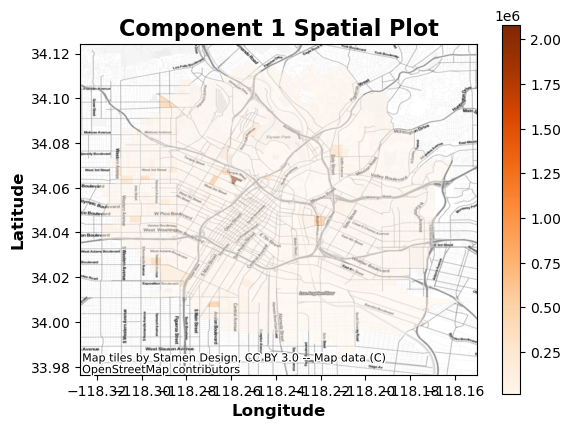

In [19]:
# Component 1

ax1 = fmat_a_df.plot(column='component 1', cmap='Oranges', edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax1, crs=geo_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Component 1 Spatial Plot', size=16, fontweight="bold")
plt.xlabel('Longitude', size=12, fontweight="bold")
plt.ylabel('Latitude', size=12, fontweight="bold")

#ax1 = fmat_a_df.convex_hull.plot(color='None', edgecolor='black', linewidth=1, ax=ax1)
#ax1 = fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax1)
#ax1 = area_bound_df.plot(color='None', ax=ax1)

#plt.savefig('rank4-component1-basemap.png', dpi=1200)

#### Component 2 Spatial Plot

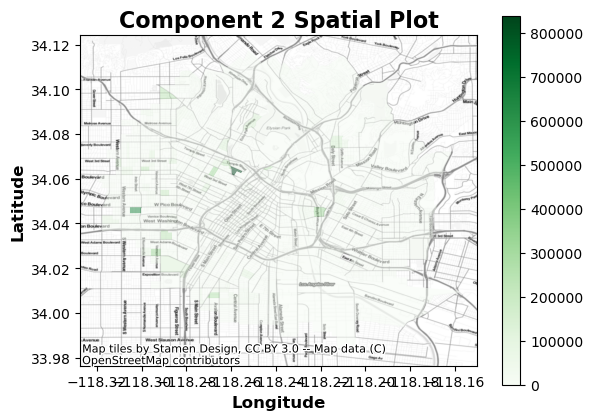

In [20]:
# Component 2

ax2 = fmat_a_df.plot(column='component 2', cmap='Greens', edgecolor='b', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax2, crs=geo_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Component 2 Spatial Plot', size=16, fontweight="bold")
plt.xlabel('Longitude', size=12, fontweight="bold")
plt.ylabel('Latitude', size=12, fontweight="bold")

#ax2 = fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax2)
#ax2 = area_bound_df.plot(color='None', ax=ax2)

#plt.savefig('rank4-component2-basemap.png', dpi=1200)

#### Component 3 Spatial Plot

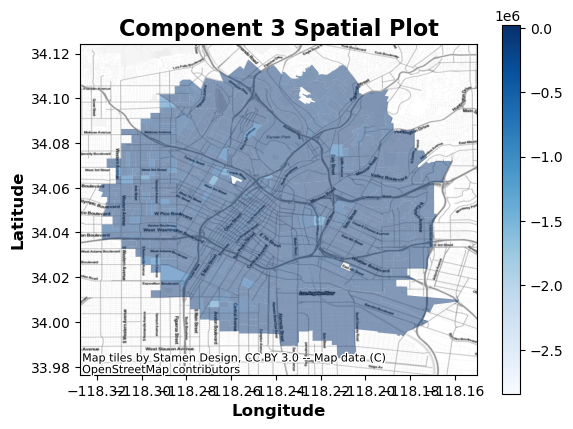

In [69]:
# Component 3

ax3 = fmat_a_df.plot(column='component 3', cmap='Blues', edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax3, crs=geo_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Component 3 Spatial Plot', size=16, fontweight="bold")
plt.xlabel('Longitude', size=12, fontweight="bold")
plt.ylabel('Latitude', size=12, fontweight="bold")

#ax3 = fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax3)
#ax3 = area_bound_df.plot(color='None', ax=ax3)

#plt.savefig('rank4-component3-basemap.png', dpi=1200)

#### Component 4 Spatial Plot

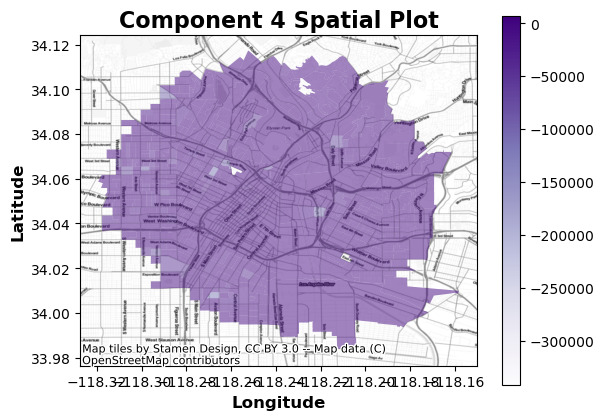

In [70]:
# Component 4

ax4 = fmat_a_df.plot(column='component 4', cmap='Purples', edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax4, crs=geo_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Component 4 Spatial Plot', size=16, fontweight="bold")
plt.xlabel('Longitude', size=12, fontweight="bold")
plt.ylabel('Latitude', size=12, fontweight="bold")

#ax4 = fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax4)
#ax4 = area_bound_df.plot(color='None', ax=ax4)

#plt.savefig('rank4-component4-basemap.png', dpi=1200)

### Time Series Plots for Rank 3 CMTF Model
- Correspond to `fmat_b` (month) & `fmat_c` (week #)

### Time Series based on week

In [23]:
fmat_c_df = pd.DataFrame(fmat_c, columns = ('comp1 week', 'comp2 week', 'comp3 week', 'comp4 week'))

In [24]:
fmat_c_df.head()

,comp1 week,comp2 week,comp3 week,comp4 week
0,0.026382,0.000000e+00,0.008582,0.053223
1,0.026110,6.938894e-18,0.007804,0.042083
2,0.025729,1.040834e-17,0.007716,0.041640
3,0.025085,1.040834e-17,0.007533,0.040661
4,0.027792,7.020209e-18,0.005422,0.007721


#### All Time Series (week)

In [36]:
week_num = np.arange(53)
week_ticks = np.arange(0, 53, 5)
#month_starts = [1,5,9,14,18,23,27,31,36,40,44,49]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

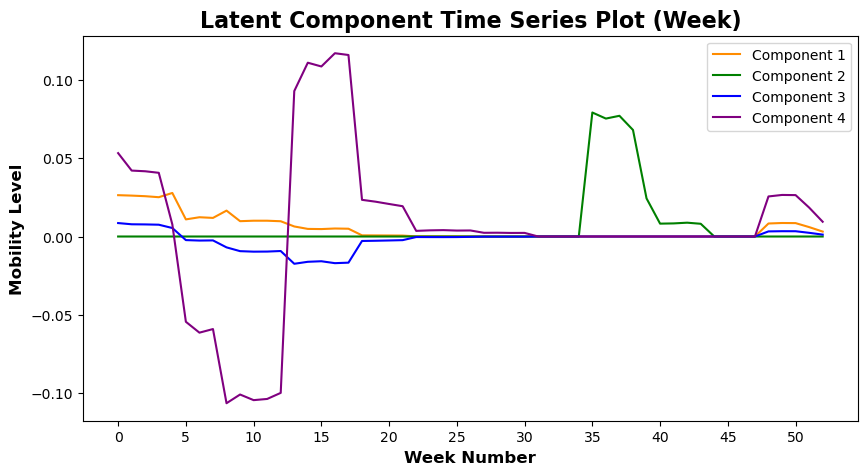

In [57]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(week_num, fmat_c_df['comp1 week'], color='darkorange', label = 'Component 1')
ax.plot(week_num, fmat_c_df['comp2 week'], color='green', label = 'Component 2')
ax.plot(week_num, fmat_c_df['comp3 week'], color='blue', label = 'Component 3')
ax.plot(week_num, fmat_c_df['comp4 week'], color='purple', label = 'Component 4')

ax.set_xticks(week_ticks)

# Month labels
#ax.set_xticks(month_starts)
#ax.set_xticklabels(month_names)

# titles and labels and legends
plt.title('Latent Component Time Series Plot (Week)', size=16, fontweight="bold")
plt.xlabel('Week Number', size=12, fontweight="bold")
plt.ylabel('Mobility Level', size=12, fontweight="bold")
plt.legend()

#plt.savefig('rank4-allcomponents-week-timeseries.png', dpi=1200)

#### Component 1 Time Series (week)

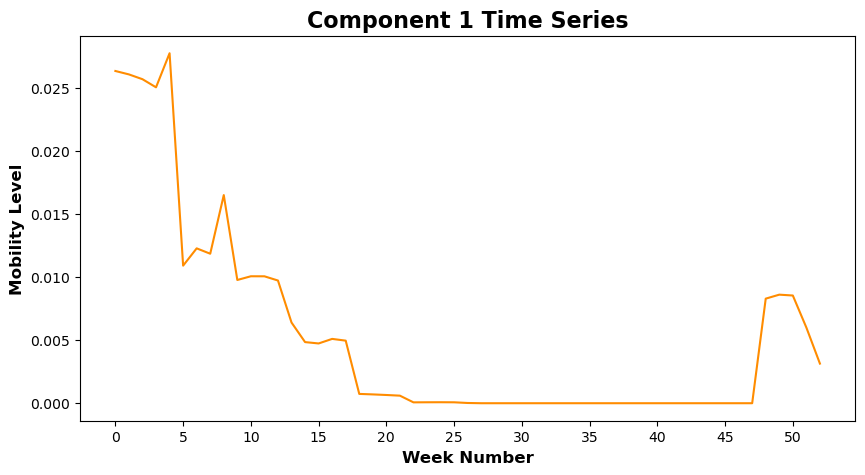

In [51]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(week_num, fmat_c_df['comp1 week'], color='darkorange')

ax1.set_xticks(week_ticks)

# Month labels
#ax1.set_xticks(month_starts)
#ax1.set_xticklabels(month_names)

# titles and labels and legends
plt.title('Component 1 Time Series', size=16, fontweight="bold")
plt.xlabel('Week Number', size=12, fontweight="bold")
plt.ylabel('Mobility Level', size=12, fontweight="bold")

#plt.savefig('rank4-component1-week-timeseries.png', dpi=1200)

#### Component 2 Time Series (week)

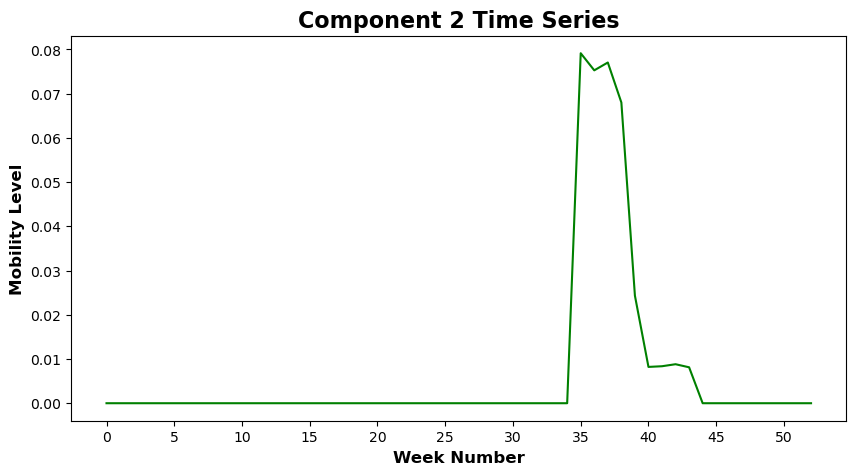

In [52]:
fig, ax2 = plt.subplots(figsize = (10, 5))
ax2.plot(week_num, fmat_c_df['comp2 week'], color='green')

ax2.set_xticks(week_ticks)

# Month labels
#ax2.set_xticks(month_starts)
#ax2.set_xticklabels(month_names)

# titles and labels and legends
plt.title('Component 2 Time Series', size=16, fontweight="bold")
plt.xlabel('Week Number', size=12, fontweight="bold")
plt.ylabel('Mobility Level', size=12, fontweight="bold")

#plt.savefig('rank4-component2-week-timeseries.png', dpi=1200)

#### Component 3 Time Series (week)

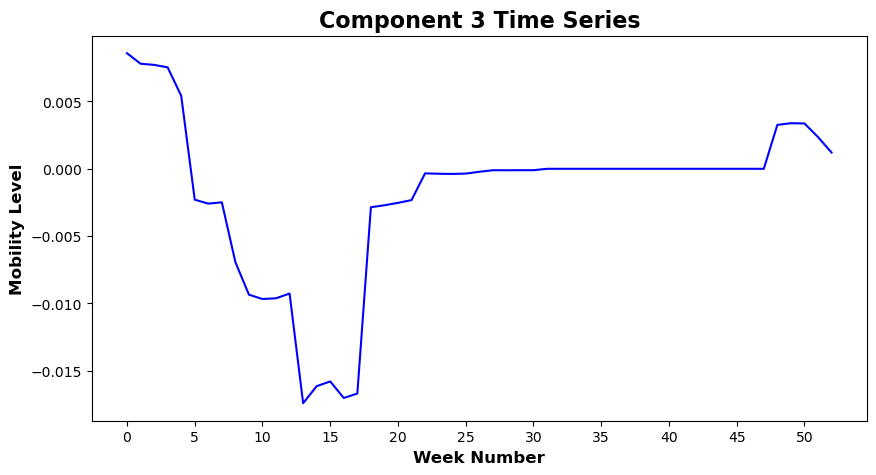

In [53]:
fig, ax3 = plt.subplots(figsize = (10, 5))
ax3.plot(week_num, fmat_c_df['comp3 week'], color='blue')

ax3.set_xticks(week_ticks)

# Month labels
#ax3.set_xticks(month_starts)
#ax3.set_xticklabels(month_names)

# titles and labels and legends
plt.title('Component 3 Time Series', size=16, fontweight="bold")
plt.xlabel('Week Number', size=12, fontweight="bold")
plt.ylabel('Mobility Level', size=12, fontweight="bold")

#plt.savefig('rank4-component3-week-timeseries.png', dpi=1200)

#### Component 4 Time Series (week)

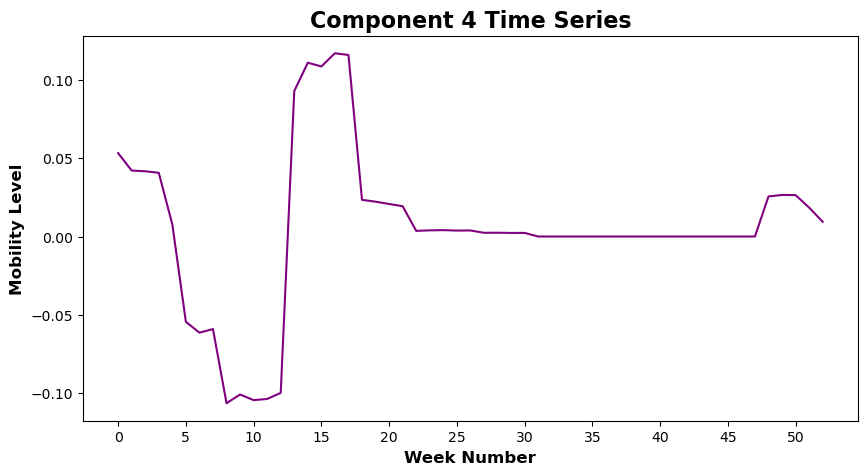

In [54]:
fig, ax4 = plt.subplots(figsize = (10, 5))
ax4.plot(week_num, fmat_c_df['comp4 week'], color='purple')

ax4.set_xticks(week_ticks)

# Month labels
#ax4.set_xticks(month_starts)
#ax4.set_xticklabels(month_names)

# titles and labels and legends
plt.title('Component 4 Time Series', size=16, fontweight="bold")
plt.xlabel('Week Number', size=12, fontweight="bold")
plt.ylabel('Mobility Level', size=12, fontweight="bold")

#plt.savefig('rank4-component4-week-timeseries.png', dpi=1200)

## Added 3.6.2023
- Spatial Plots with reversed colorbars (cmaps) for Components 3 and 4

#### Component 3 Spatial Plot (reversed colorbars)

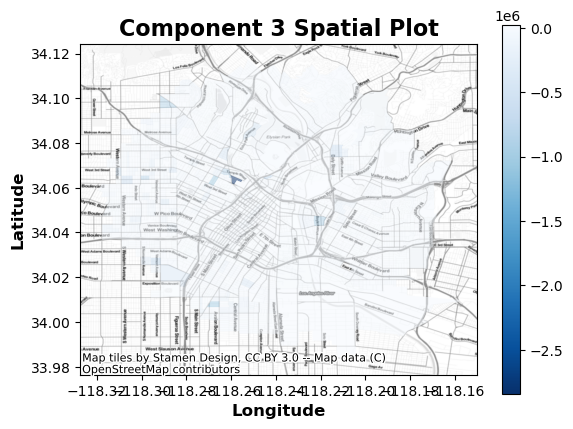

In [16]:
# Component 3 (reversed colorbars)

rev_blues = plt.cm.get_cmap('Blues').reversed()

ax3 = fmat_a_df.plot(column='component 3', cmap=rev_blues, edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax3, crs=geo_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Component 3 Spatial Plot', size=16, fontweight="bold")
plt.xlabel('Longitude', size=12, fontweight="bold")
plt.ylabel('Latitude', size=12, fontweight="bold")

#ax3 = fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax3)
#ax3 = area_bound_df.plot(color='None', ax=ax3)

#plt.savefig('rank4-component3-basemap-reversedcmap.png', dpi=1200)

#### Component 4 Spatial Plot (reversed colorbars)

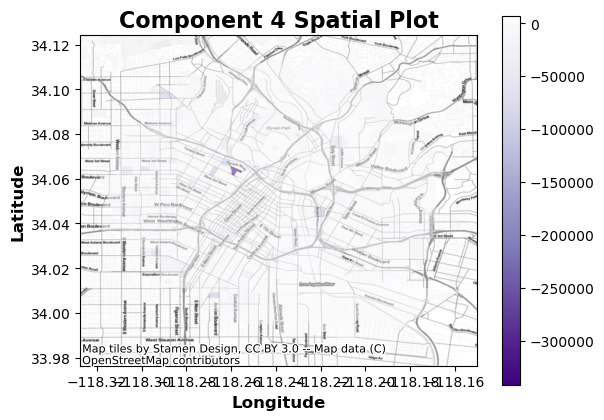

In [17]:
# Component 4

rev_purples = plt.cm.get_cmap('Purples').reversed()

ax4 = fmat_a_df.plot(column='component 4', cmap=rev_purples, edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax4, crs=geo_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Component 4 Spatial Plot', size=16, fontweight="bold")
plt.xlabel('Longitude', size=12, fontweight="bold")
plt.ylabel('Latitude', size=12, fontweight="bold")

#ax4 = fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax4)
#ax4 = area_bound_df.plot(color='None', ax=ax4)

#plt.savefig('rank4-component4-basemap-reversedcmap.png', dpi=1200)

### Time Series based on Month

In [55]:
fmat_b_df = pd.DataFrame(fmat_b, columns = ('comp1 month', 'comp2 month', 'comp3 month', 'comp4 month'))

In [56]:
fmat_b_df.head()

,comp1 month,comp2 month,comp3 month,comp4 month
0,0.775008,4.440892e-16,-0.427670,-0.308664
1,0.395878,-4.996004e-16,0.190360,0.432534
2,0.323042,-9.992007e-16,0.596957,0.756467
3,0.153712,3.608225e-16,0.802281,-0.649455
4,0.022693,1.110223e-16,0.136215,-0.138969


#### All Time Series (Month)

In [59]:
#month_starts = [1,5,9,14,18,23,27,31,36,40,44,49]
month_num = np.arange(12)
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

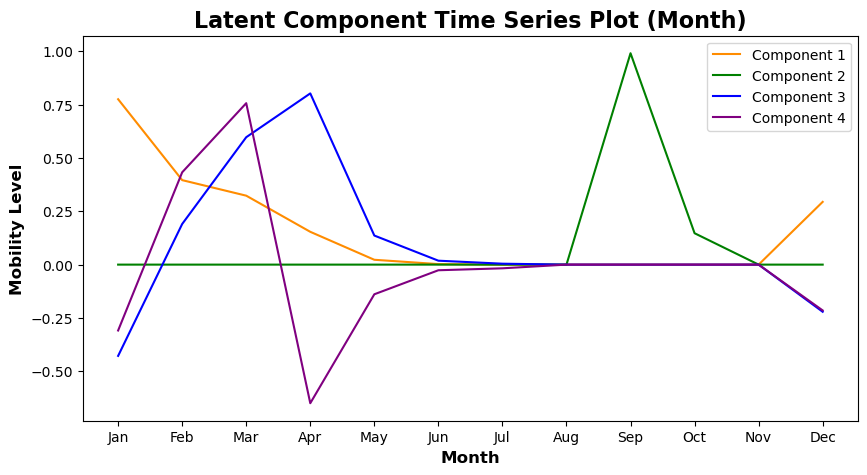

In [67]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(month_num, fmat_b_df['comp1 month'], color='darkorange', label = 'Component 1')
ax.plot(month_num, fmat_b_df['comp2 month'], color='green', label = 'Component 2')
ax.plot(month_num, fmat_b_df['comp3 month'], color='blue', label = 'Component 3')
ax.plot(month_num, fmat_b_df['comp4 month'], color='purple', label = 'Component 4')

# Month labels
ax.set_xticks(month_num)
ax.set_xticklabels(month_names)

# titles and labels and legends
plt.title('Latent Component Time Series Plot (Month)', size=16, fontweight="bold")
plt.xlabel('Month', size=12, fontweight="bold")
plt.ylabel('Mobility Level', size=12, fontweight="bold")
plt.legend()

#plt.savefig('rank4-allcomponents-month-timeseries.png', dpi=1200)

#### Component 1 Time Series (Month)
- NOTE: did not save yet or create more component plots because only compiled plot needed for poster (not enough space for individual plots)

Text(0, 0.5, 'Mobility Level')

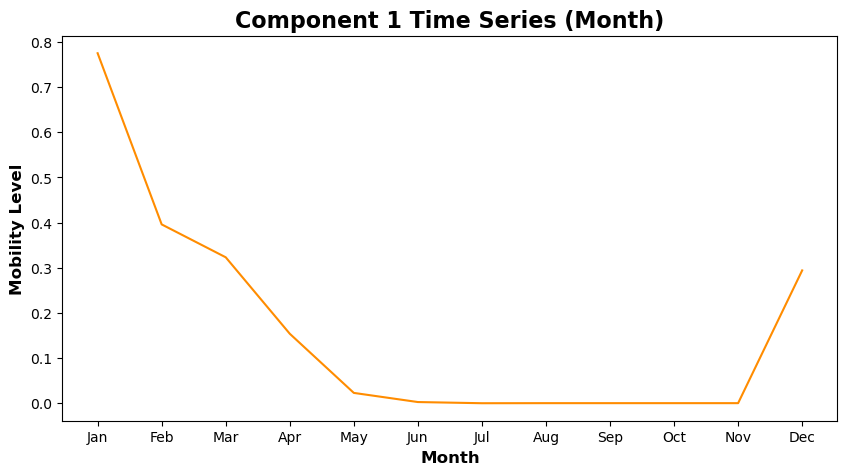

In [64]:
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(month_num, fmat_b_df['comp1 month'], color='darkorange')

# Month labels
ax1.set_xticks(month_num)
ax1.set_xticklabels(month_names)

# titles and labels and legends
plt.title('Component 1 Time Series (Month)', size=16, fontweight="bold")
plt.xlabel('Month', size=12, fontweight="bold")
plt.ylabel('Mobility Level', size=12, fontweight="bold")

#plt.savefig('rank4-component1-month-timeseries.png', dpi=1200)